In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import time
import math
#import matplotlib.patches as mppatch
import bghelperfunctions as bg
import scipy.ndimage.measurements as im_meas
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

## Data import and munging

In [2]:
# real data
df = pd.read_csv('C:\\Users\\Doug\\Dropbox\\Apps\\Glimp\\GlicemiaMisurazioni.csv.gz', 
                compression='gzip', 
                header=None, 
                sep=';',
                encoding='utf-16-le', 
                usecols=[1,4,5], 
                names=['datetime', 'uncalibrated_reading', 'calibrated_reading'])

df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H.%M.%S')
df['time'] = df['datetime'].dt.time
df['date'] = df['datetime'].dt.date
df['BG, mmoll-1'] = (df['calibrated_reading']/18.0).round(1)
df.set_index(df['datetime'], inplace=True)
df.head()

,datetime,uncalibrated_reading,calibrated_reading,time,date,"BG, mmoll-1"
datetime,,,,,,
2019-01-13 23:23:30,2019-01-13 23:23:30,268.0,284.0,23:23:30,2019-01-13,15.8
2019-01-13 23:22:30,2019-01-13 23:22:30,270.0,286.0,23:22:30,2019-01-13,15.9
2019-01-13 23:21:30,2019-01-13 23:21:30,271.0,288.0,23:21:30,2019-01-13,16.0
2019-01-13 23:20:30,2019-01-13 23:20:30,271.0,288.0,23:20:30,2019-01-13,16.0
2019-01-13 23:19:30,2019-01-13 23:19:30,272.0,289.0,23:19:30,2019-01-13,16.1


## Today's BGs

In [ ]:
fig, ax = plt.subplots(1,1,figsize=[10,5])
bg.plot_daily_BG(df, datetime.date.today(), ax)


## This week's BGs

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
sunday = bg.lastWday(datetime.date.today() - datetime.timedelta(days=0), 6)
weekdays = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

fig2, ax2 = plt.subplots(4,2, figsize=[10,10])
for didx in range(7):
    date = sunday + datetime.timedelta(days=didx)
    axidx = (int(math.floor(didx/2)), didx % 2)
    if date <= datetime.date.today():
        bg.plot_daily_BG(df, date, ax2[axidx])
        ax2[axidx].set_title(date.strftime("%a %b %d, %Y"))
    else:
        ax2[axidx].set_visible(False)
ax2[-1,1].set_visible(False)
plt.tight_layout()


## Monthly summary

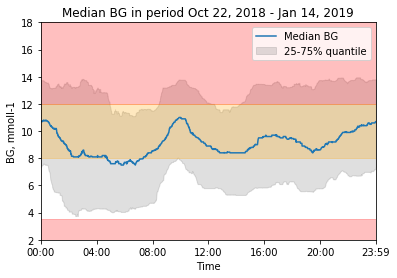

In [4]:
enddate = datetime.date.today()
startdate = datetime.date.today() - datetime.timedelta(days=28*3)
ax = bg.plot_long_term_BG(df, startdate, enddate)

In [ ]:
time_band_targetses = [];
time_band_targetses.append(TimeBandTargets());
time_band_targetses.append(TimeBandTargets(time_band_name='Pre-breakfast',
                                           time_start_end=(7,8),
                                           target_bg=(4.0, 8.0)))
time_band_targetses.append(TimeBandTargets(time_band_name='Pre-lunch',
                                           time_start_end=(10.5,12),
                                           target_bg=(3.5, 8.0)))
time_band_targetses.append(TimeBandTargets(time_band_name='Pre-dinner',
                                           time_start_end=(16,18),
                                           target_bg=(3.5, 8.0)))

enddate = datetime.date.today()
startdate = datetime.date.today() - datetime.timedelta(days=28*3)
output = bg.percentageTimeInTarget(df, startdate, enddate, time_band_targetses);

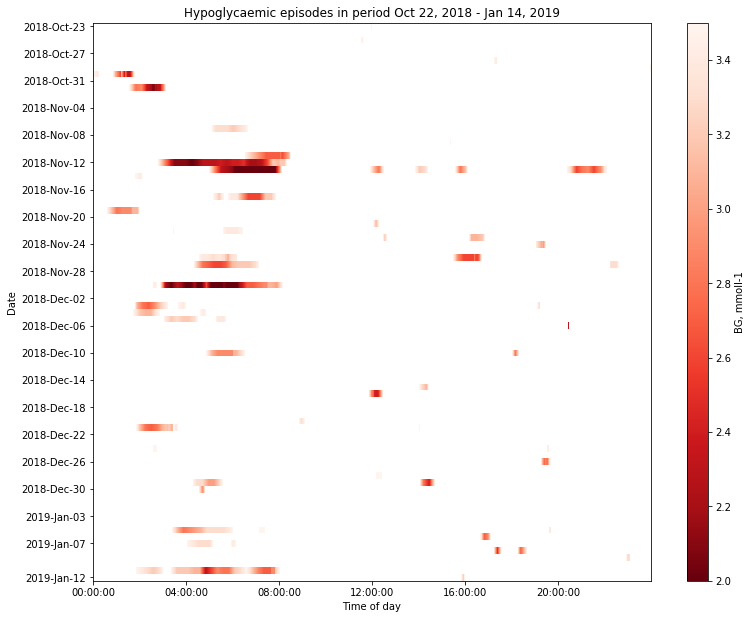

In [3]:
enddate = datetime.date.today()
startdate = datetime.date.today() - datetime.timedelta(days=28*3)
bg.plot_hypos(df, startdate, enddate)

In [ ]:
tmpfilename='C:\\Users\\Doug\\Desktop\\GlicemiaMisurazioni.csv'
with open(tmpfilename, "rb") as f:
    print(f.read(1));
    print(f.read(1));
    
    